# Supplementary Information

This notebook covers the figures prepared for the supplementary information section.

## Contents

* [02 CVs](#02-CVs)
* [05 MSM when only WPD loop steered](#05-MSM-when-only-WPD-loop-steered)
* [06 More clusters](#06-More-clusters)
* [07 Increased seeded MD duration](#07-Increased-seeded-MD-duration)
* [08 Different PCCA metastable state assignments](#08-Different-PCCA-metastable-state-assignments)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ammo.msm import MSMCollection, MSM

/home/adele/anaconda3/envs/bss/lib/python3.9/site-packages/pyemma/util/log.py:41: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(yaml.__version__) >= LooseVersion('5.1'):
/home/adele/anaconda3/envs/bss/lib/python3.9/site-packages/pyemma/util/log.py:41: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(yaml.__version__) >= LooseVersion('5.1'):
/home/adele/anaconda3/envs/bss/lib/python3.9/site-packages/msmtools/analysis/sparse/assessment.py:24: DeprecationWarning: Please use `isdense` from the `scipy.sparse` namespace, the `scipy.sparse.sputils` namespace is deprecated.
  from scipy.sparse.sputils import isdense
/home/adele/anaconda3/envs/bss/lib/python3.9/site-packages/msmtools/analysis/sparse/assessment.py:25: DeprecationWarning: Please use `diags` from the `scipy.sparse` namespace, the `scipy.sparse.construct` namespace is deprecated.
  from scipy.sparse.constru

## 02 CVs

[top](#Supplementary-Information)

Load the values of CVs used for sMD during 1 $\mu$s MD simulations of the reference system when the WPD loop was open and closed. The files contain time (ns), WPD loop RMSD to the closed conformation (A), Tyr152 $\chi$1 angle (degrees), Pro185 stacking distance (A)

In [3]:
cvs_open = np.loadtxt('../systems/reference/open/equilibrium/cvs.txt')
cvs_closed = np.loadtxt('../systems/reference/closed/equilibrium/cvs.txt')

Plot:

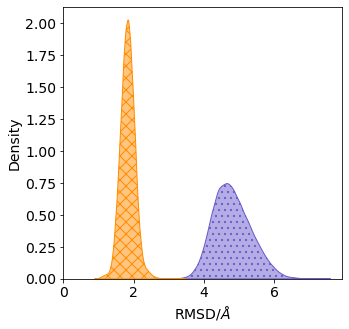

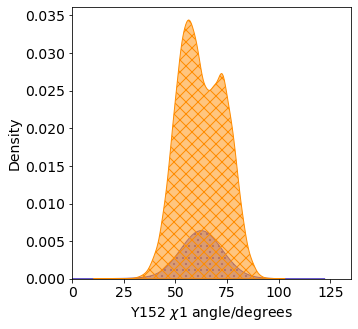

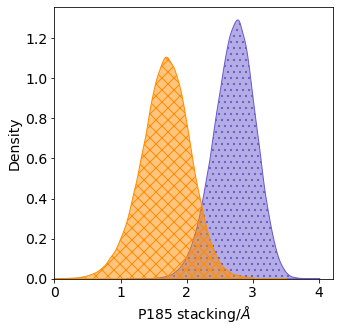

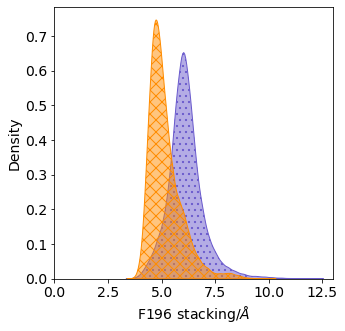

In [4]:
cvs_xlabels = ['RMSD/$\AA$', 'Y152 $\chi$1 angle/degrees', 'P185 stacking/$\AA$', 'F196 stacking/$\AA$']

for i in range(1,5):    
    fig, ax = plt.subplots(1, figsize=(5,5))
    sns.kdeplot(cvs_open[i], shade=True, color='slateblue', alpha=0.5, hatch='..', ax=ax)
    sns.kdeplot(cvs_closed[i], shade=True, color='darkorange', alpha=0.5, hatch='xx', ax=ax)
    ax.set_ylabel('Density', size=14)
    ax.set_xlabel(cvs_xlabels[i-1], size=14)
    ax.set_xlim(0,None)

## 05 MSM when only WPD loop steered

[top](#Supplementary-Information)

Compare MSM results when the sMD protocol included only steering the WPD loop, to the final protocol which includes steering the allosteric network as well.

#### Load original data

In [5]:
msms = MSMCollection('msm.pkl')

#### Add repeat

In [6]:
msms.add_msm('1_repeat')
msms['1_repeat'].load_data([f'../systems/peptide-1_repeat/open/seeded-md', f'../systems/peptide-1_repeat/closed/seeded-md'],
                            file_names=['wpd_loop.txt', 'p_loop.txt'],
                            features=['WPD loop RMSD/$\AA$', 'P loop RMSD/$\AA$'])
msms['1_repeat'].assign_to_clusters(cluster_centers=msms.clusters.clustercenters)
msms['1_repeat'].build_msm(2000)

../systems/peptide-1_repeat/open/seeded-md
../systems/peptide-1_repeat/closed/seeded-md
trajectory 100/100


In [7]:
msms['1_repeat'].bootstrapping(2, msms['reference'], min_iter=100)

State 1: 11.66% ± 3.47% (100 iterations)
State 2: 88.34% ± 3.47% (100 iterations)


{1: [11.66, 3.47, 100], 2: [88.34, 3.47, 100]}

#### Build MSMs using data from loop-only steering

In [8]:
locations = []
titles = ['reference', '1', '1_repeat', '2r']
for title in titles:
    if title != 'reference':
        title = f'peptide-{title}'
    locations.append([f'../systems/{title}/open/seeded-md_wpd', f'../systems/{title}/closed/seeded-md_wpd'])

In [9]:
msms_wpd = MSMCollection()
msms_wpd.load_data(titles, locations,
                   file_names=['wpd_loop.txt', 'p_loop.txt'],
                   features=['WPD loop RMSD/$\AA$', 'P loop RMSD/$\AA$'])

Loading data...
reference MSM
../systems/reference/open/seeded-md_wpd
../systems/reference/closed/seeded-md_wpd
trajectory 100/100
--------------------
1 MSM
../systems/peptide-1/open/seeded-md_wpd
../systems/peptide-1/closed/seeded-md_wpd
trajectory 100/100
--------------------
1_repeat MSM
../systems/peptide-1_repeat/open/seeded-md_wpd
../systems/peptide-1_repeat/closed/seeded-md_wpd
trajectory 100/100
--------------------
2r MSM
../systems/peptide-2r/open/seeded-md_wpd
../systems/peptide-2r/closed/seeded-md_wpd
trajectory 100/100
--------------------
...done.


In [10]:
msms_wpd.cluster()
msms_wpd.assign_to_clusters()
msms_wpd.build_msms(2000)
msms_wpd.pcca_assignments(2, msm=['reference'], disconnected=1)

13-02-23 12:52:18 pyemma.coordinates.clustering.kmeans.KmeansClustering[304] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.
Building MSMs...
...done.

Metastable state assignments based on reference MSM, 2 states:
reference
MS 1 has 34 counts and 27.4% probability (± 0.59%)
MS 2 has 66 counts and 72.6% probability (± 0.88%)
--------------------
1
MS 1 has 34 counts and 14.17% probability (± 0.29%)
MS 2 has 66 counts and 85.83% probability (± 0.74%)
--------------------
1_repeat
MS 1 has 34 counts and 35.63% probability (± 0.53%)
MS 2 has 66 counts and 64.37% probability (± 0.49%)
--------------------
2r
MS 1 has 34 counts and 26.98% probability (± 0.59%)
MS 2 has 66 counts and 73.02% probability (± 0.68%)
--------------------



In [11]:
bootstrapped_probabilities_wpd = msms_wpd.bootstrapping(2, msm='reference', min_iter=100, max_iter=100)

Bootstrapped probabilities, based on reference MSM, 2 states:
reference
State 1: 26.71% ± 5.97% (100 iterations)
State 2: 73.29% ± 5.97% (100 iterations)
------------------------------
1
State 1: 13.99% ± 3.5% (100 iterations)
State 2: 86.01% ± 3.5% (100 iterations)
------------------------------
1_repeat
State 1: 37.02% ± 7.55% (100 iterations)
State 2: 62.98% ± 7.55% (100 iterations)
------------------------------
2r
State 1: 27.5% ± 5.36% (100 iterations)
State 2: 72.5% ± 5.36% (100 iterations)
------------------------------


#### Compare

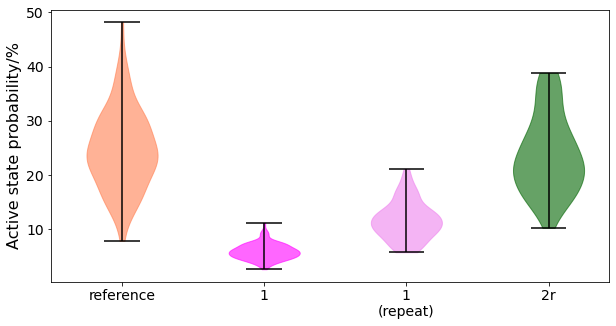

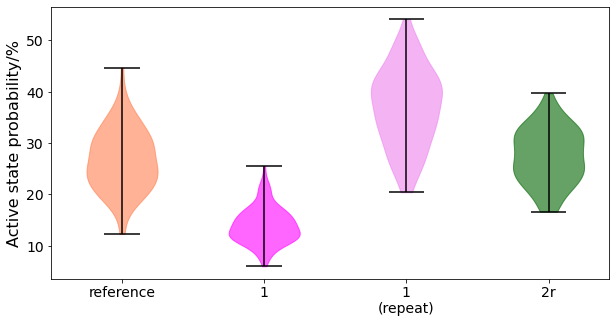

In [12]:
data = [[msms[msm].bootstrapping_data['reference, 2 states']['probabilities'][:,0] for msm in titles],
        [msms_wpd[msm].bootstrapping_data['reference, 2 states']['probabilities'][:,0] for msm in titles]]
        
labels = [None, 'reference', '1', '1\n(repeat)', '2r']
colors = ['coral', 'magenta', 'violet', 'darkgreen']

plot_titles = ['(a)', '(b)']

for i in range(len(data)):
    fig, ax = plt.subplots(1, figsize=(10,5))
    violins = ax.violinplot(data[i])
    for violin, color in zip(violins['bodies'], colors):
        violin.set_color(color)
        violin.set_alpha(0.6)
    violins['cmaxes'].set_color('black')
    violins['cbars'].set_color('black')
    violins['cmins'].set_color('black')
    ax.set_xticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_ylabel('Active state probability/%')
    ax.set_xlim(0.5, None)

## 06 More clusters

[top](#Supplementary-Information)

Compare the effects of using 100, 200, and 300 cluster centers (microstates) for discretizing data.

In [13]:
locations = []
titles = ['reference', '1', '2r']
for title in titles:
    if title != 'reference':
        title = f'peptide-{title}'
    locations.append([f'../systems/{title}/open/seeded-md', f'../systems/{title}/closed/seeded-md'])

In [14]:
active_probability = []
mfpr_12 = []
mfpr_21 = []

#### 100 clusters

In [15]:
clusters_100 = MSMCollection('msm.pkl')

In [16]:
clusters_100.mfpr(2, ['reference'])

MFPRs based on reference MSM, 2 states:
apo
1->2 transition: 13.457/μs (± 0.216/μs)
2->1 transition: 1.442/μs (± 0.021/μs)
--------------------
reference
1->2 transition: 6.341/μs (± 0.15/μs)
2->1 transition: 1.972/μs (± 0.028/μs)
--------------------
1
1->2 transition: 17.314/μs (± 0.284/μs)
2->1 transition: 1.18/μs (± 0.016/μs)
--------------------
2
1->2 transition: 2.834/μs (± 0.123/μs)
2->1 transition: 2.651/μs (± 0.038/μs)
--------------------
2r
1->2 transition: 4.48/μs (± 0.148/μs)
2->1 transition: 1.64/μs (± 0.025/μs)
--------------------
3
1->2 transition: 6.751/μs (± 0.154/μs)
2->1 transition: 0.791/μs (± 0.018/μs)
--------------------
3u
1->2 transition: 5.307/μs (± 0.175/μs)
2->1 transition: 1.824/μs (± 0.03/μs)
--------------------
4
1->2 transition: 3.723/μs (± 0.152/μs)
2->1 transition: 1.786/μs (± 0.028/μs)
--------------------



In [17]:
active_probability.append([clusters_100[msm].metastable_assignments['reference, 2 states'][1][0] for msm in titles])
mfpr_12.append([clusters_100[msm].mfpr['reference, 2 states']['1,2'][0] for msm in titles])
mfpr_21.append([clusters_100[msm].mfpr['reference, 2 states']['2,1'][0] for msm in titles])

#### 200 clusters

In [19]:
clusters_200 = MSMCollection()
clusters_200.load_data(titles, locations,
                       file_names=['wpd_loop.txt', 'p_loop.txt'],
                       features=['WPD loop RMSD/$\AA$', 'P loop RMSD/$\AA$'])
clusters_200.cluster(n_clusters=200)
clusters_200.assign_to_clusters()
clusters_200.build_msms(2000)
clusters_200.pcca_assignments(2, msm=['reference'], disconnected=1)
clusters_200.mfpr(2, ['reference'])

Loading data...
reference MSM
../systems/reference/open/seeded-md
../systems/reference/closed/seeded-md
trajectory 100/100
--------------------
1 MSM
../systems/peptide-1/open/seeded-md
../systems/peptide-1/closed/seeded-md
trajectory 100/100
--------------------
2r MSM
../systems/peptide-2r/open/seeded-md
../systems/peptide-2r/closed/seeded-md
trajectory 100/100
--------------------
...done.
13-02-23 13:40:28 pyemma.coordinates.clustering.kmeans.KmeansClustering[1519] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.
Building MSMs...
...done.

Metastable state assignments based on reference MSM, 2 states:
reference
MS 1 has 56 counts and 27.34% probability (± 0.28%)
MS 2 has 144 counts and 72.66% probability (± 0.33%)
--------------------
1
MS 1 has 56 counts and 6.26% probability (± 0.12%)
MS 2 has 144 counts and 93.74% probability (± 0.39%)
--------------------
2r
MS 1 has 56 counts and 24.23% probability (± 0.22%)
MS 2 h

In [20]:
active_probability.append([clusters_200[msm].metastable_assignments['reference, 2 states'][1][0] for msm in titles])
mfpr_12.append([clusters_200[msm].mfpr['reference, 2 states']['1,2'][0] for msm in titles])
mfpr_21.append([clusters_200[msm].mfpr['reference, 2 states']['2,1'][0] for msm in titles])

#### 300 clusters

In [21]:
clusters_300 = MSMCollection()
clusters_300.load_data(titles, locations,
                       file_names=['wpd_loop.txt', 'p_loop.txt'],
                       features=['WPD loop RMSD/$\AA$', 'P loop RMSD/$\AA$'])
clusters_300.cluster(n_clusters=300)
clusters_300.assign_to_clusters()
clusters_300.build_msms(2000)
clusters_300.pcca_assignments(2, msm=['reference'], disconnected=1)
clusters_300.mfpr(2, ['reference'])

Loading data...
reference MSM
../systems/reference/open/seeded-md
../systems/reference/closed/seeded-md
trajectory 100/100
--------------------
1 MSM
../systems/peptide-1/open/seeded-md
../systems/peptide-1/closed/seeded-md
trajectory 100/100
--------------------
2r MSM
../systems/peptide-2r/open/seeded-md
../systems/peptide-2r/closed/seeded-md
trajectory 100/100
--------------------
...done.
13-02-23 13:43:19 pyemma.coordinates.clustering.kmeans.KmeansClustering[1530] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.
Building MSMs...
...done.

Metastable state assignments based on reference MSM, 2 states:
reference
MS 1 has 80 counts and 27.86% probability (± 0.2%)
MS 2 has 220 counts and 72.14% probability (± 0.21%)
--------------------
1
MS 1 has 80 counts and 6.32% probability (± 0.08%)
MS 2 has 220 counts and 93.68% probability (± 0.26%)
--------------------
2r
MS 1 has 80 counts and 24.51% probability (± 0.16%)
MS 2 ha

In [22]:
active_probability.append([clusters_300[msm].metastable_assignments['reference, 2 states'][1][0] for msm in titles])
mfpr_12.append([clusters_300[msm].mfpr['reference, 2 states']['1,2'][0] for msm in titles])
mfpr_21.append([clusters_300[msm].mfpr['reference, 2 states']['2,1'][0] for msm in titles])

#### Compare

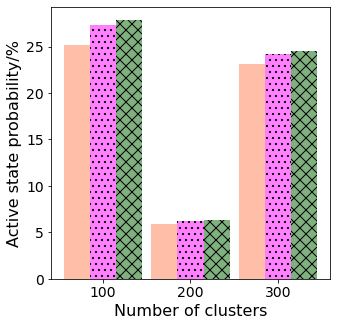

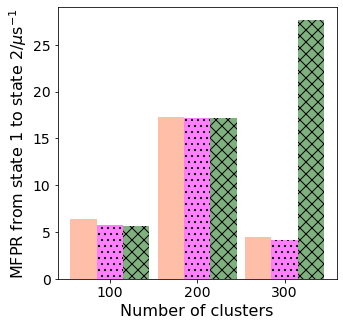

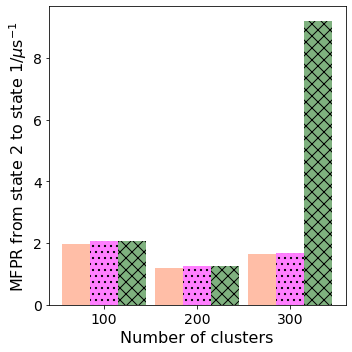

In [23]:
x = np.arange(3)
offsets = [-0.3, 0, 0.3]

values = [active_probability, mfpr_12, mfpr_21]
labels = ['100', '200', '300']
ylabels = ['Active state probability/%', 'MFPR from state 1 to state 2/$\mu$s$^{-1}$', 'MFPR from state 2 to state 1/$\mu$s$^{-1}$']
colors = ['coral', 'magenta', 'darkgreen']
hatches = [None, '..', 'xx']

for i in range(len(ylabels)):
    fig, ax = plt.subplots(1, figsize=(5,5))
    for j in range(len(titles)):
        ax.bar(x+offsets[j], values[i][j], 0.3, alpha=0.5, label=titles[j], color=colors[j], hatch=hatches[j])
    ax.set_ylabel(ylabels[i])
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_xlabel('Number of clusters')
    
fig.tight_layout()

## 07 Increased seeded MD sampling

Test the effects of increasing seeded MD duration and using a larger number of seeded MD trajectories, using compound **2r** as an example. The same cluster centers will be used as for the previous MSM building, as well the metastable state assignment for the reference MSM for bootstrapping.

[top](#Supplementary-Information)

#### Original

In [24]:
cmpd_2r_original = clusters_100['2r']

#### 200 trajectories of 100 ns

In [25]:
cmpd_2r_100ns = MSM('2r 200 ns')
cmpd_2r_100ns.load_data(['../systems/peptide-2r/open/seeded-md/', '../systems/peptide-2r/closed/seeded-md'],
                        ['wpd_loop.txt', 'p_loop.txt'], frames=10000)
cmpd_2r_100ns.cluster(centers=np.loadtxt('clusters.txt'))
cmpd_2r_100ns.assign_to_clusters()
cmpd_2r_100ns.build_msm(2000)

../systems/peptide-2r/open/seeded-md/
../systems/peptide-2r/closed/seeded-md
trajectory 100/100
13-02-23 13:49:26 pyemma.coordinates.clustering.kmeans.KmeansClustering[1541] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.


In [26]:
cmpd_2r_100ns.bootstrapping(2, clusters_100['reference'], min_iter=100)

State 1: 26.59% ± 6.55% (100 iterations)
State 2: 73.41% ± 6.55% (100 iterations)


{1: [26.59, 6.55, 100], 2: [73.41, 6.55, 100]}

#### 400 trajectories of 50 ns

In [27]:
cmpd_2r_400traj = MSM('2r 200 ns')
cmpd_2r_400traj.load_data(['../systems/peptide-2r/open/seeded-md/', '../systems/peptide-2r/closed/seeded-md'],
                        ['wpd_loop.txt', 'p_loop.txt'], trajectories=np.arange(1,201))
cmpd_2r_400traj.cluster(centers=np.loadtxt('clusters.txt'))
cmpd_2r_400traj.assign_to_clusters()
cmpd_2r_400traj.build_msm(2000)

../systems/peptide-2r/open/seeded-md/
../systems/peptide-2r/closed/seeded-md
trajectory 200/200
13-02-23 14:15:34 pyemma.coordinates.clustering.kmeans.KmeansClustering[1846] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.


In [28]:
cmpd_2r_400traj.bootstrapping(2, clusters_100['reference'], min_iter=100)

State 1: 22.7% ± 4.56% (100 iterations)
State 2: 77.3% ± 4.56% (100 iterations)


{1: [22.7, 4.56, 100], 2: [77.3, 4.56, 100]}

#### Compare

(0.0, 65.0)

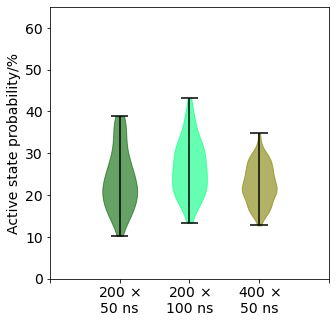

In [30]:
bootstrapping_data = [cmpd_2r_original.bootstrapping_data['reference, 2 states']['probabilities'][:,0],
                      cmpd_2r_100ns.bootstrapping_data['reference, 2 states']['probabilities'][:,0],
                      cmpd_2r_400traj.bootstrapping_data['reference, 2 states']['probabilities'][:,0]]

labels = [None, r'200 $\times$'+'\n50 ns', r'200 $\times$'+'\n100 ns', r'400 $\times$'+'\n50 ns', None]
colors = ['darkgreen', 'springgreen', 'olive', 'gold']

fig, ax = plt.subplots(1, figsize=(5,5))
violins = ax.violinplot(bootstrapping_data)
for violin, color in zip(violins['bodies'], colors):
    violin.set_color(color)
    violin.set_alpha(0.6)
violins['cmaxes'].set_color('black')
violins['cbars'].set_color('black')
violins['cmins'].set_color('black')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, size=14)
ax.set_ylabel('Active state probability/%', size=14)
ax.set_ylim(0, 65)

## 08 Different PCCA metastable state assignments

Check that using different PCCA metastable state assignments will not cause a significant change in active state probability for each system.

[top](#Supplementary-Information)

Load msms from previous analysis:

In [31]:
msms = MSMCollection('msm.pkl')
titles = ['apo', 'reference', '1', '2', '2r', '3', '3u', '4']

Run PCCA on all systems:

In [32]:
msms.pcca_assignments(2, disconnected=1)

Metastable state assignments based on apo MSM, 2 states:
apo
MS 1 has 18 counts and 5.3% probability (± 0.19%)
MS 2 has 82 counts and 94.7% probability (± 1.05%)
--------------------
reference
MS 1 has 18 counts and 18.37% probability (± 0.79%)
MS 2 has 82 counts and 81.63% probability (± 0.71%)
--------------------
1
MS 1 has 18 counts and 2.35% probability (± 0.09%)
MS 2 has 82 counts and 97.65% probability (± 0.78%)
--------------------
2
MS 1 has 18 counts and 32.07% probability (± 1.21%)
MS 2 has 82 counts and 67.93% probability (± 0.55%)
--------------------
2r
MS 1 has 18 counts and 18.13% probability (± 0.58%)
MS 2 has 82 counts and 81.87% probability (± 0.7%)
--------------------
3
MS 1 has 18 counts and 5.33% probability (± 0.3%)
MS 2 has 82 counts and 94.67% probability (± 1.0%)
--------------------
3u
MS 1 has 18 counts and 15.63% probability (± 0.36%)
MS 2 has 82 counts and 84.37% probability (± 0.68%)
--------------------
4
MS 1 has 18 counts and 19.6% probability (± 0.52

Plot each PCCA assignment on the data for the MSM it came from (e.g. the PCCA assignment based on the **1** MSM on the **1** trajectory data and so on):

ValueError: too many values to unpack (expected 2)

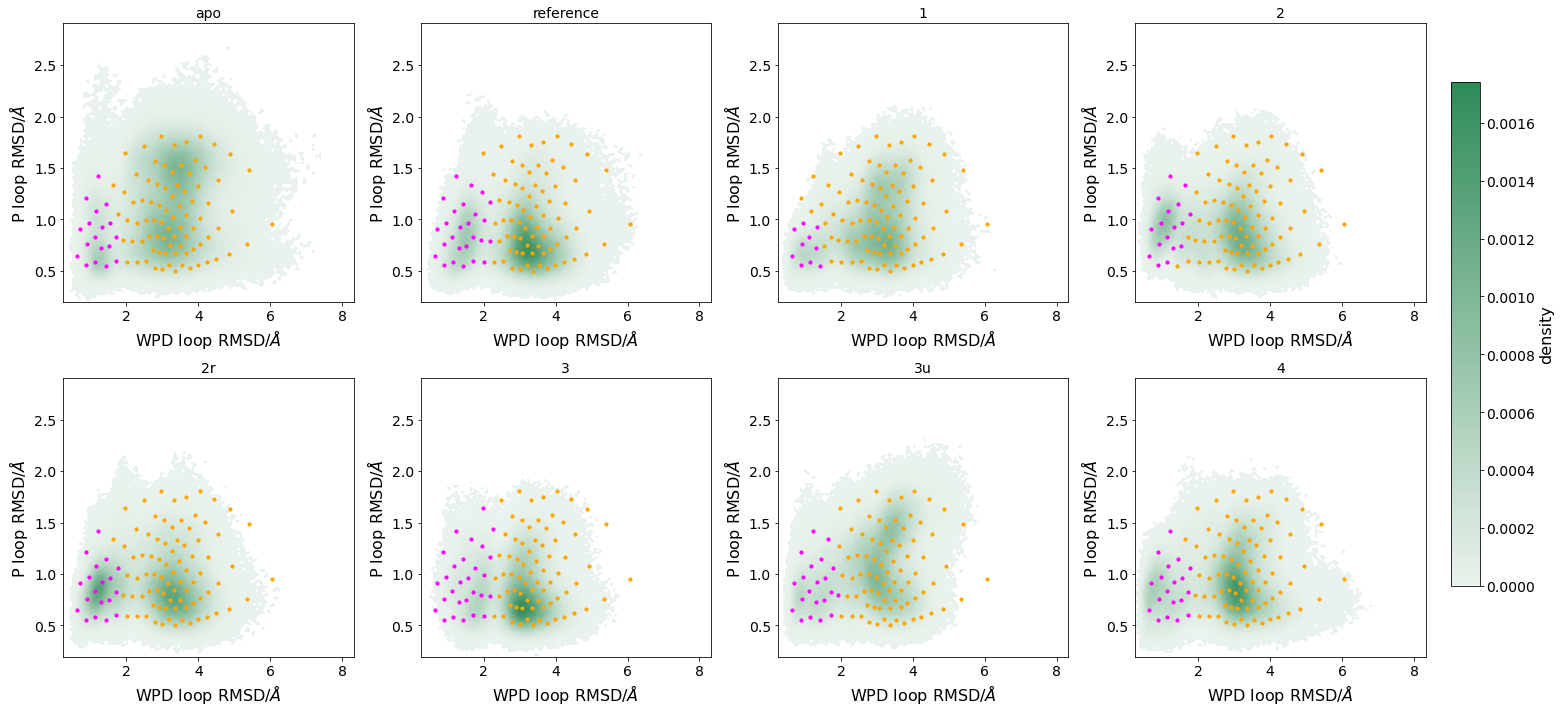

In [34]:
fig, ax = msms.plot_clusters(msms.get_pcca_clusters(2), (2,4))

Compare the results and plot:

In [35]:
pcca_ranked = []
pcca_probabilities = []
for pcca in titles:
    probabilities = [msms[msm].metastable_assignments[f'{pcca}, 2 states'][1][0] for msm in titles]
    ranks = [np.where(np.array(probabilities).argsort()==i)[0][0]+1 for i in range(len(probabilities))]
    pcca_ranked.append(ranks)
    pcca_probabilities.append(probabilities)

In [36]:
labels = ['apo', 'reference', '1', '2', '2r', '3', '3u', '4']

Active state probability %:

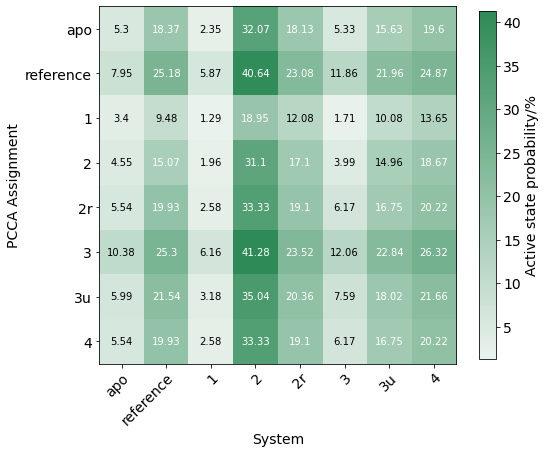

In [37]:
fig, ax = plt.subplots(1, figsize=(8, 8))
im = ax.imshow(pcca_probabilities, cmap=sns.light_palette("seagreen", as_cmap=True))

ax.set_ylabel('PCCA Assignment', size=14)
ax.set_xlabel('System', size=14)
ax.set_yticks(np.arange(len(titles)))
ax.set_yticklabels(labels, size=14)
ax.set_xticks(np.arange(len(titles)))
ax.set_xticklabels(labels, size=14)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

cbar = ax.figure.colorbar(im, shrink=0.8)
cbar.set_label('Active state probability/%', size=14)

colors = []
for point in np.hstack(pcca_probabilities):
    if point<=15:
        color = 'black'
    else:
        color = 'white'
    colors.append(color)
colors = np.array(colors).reshape(8,8)
for i in range(8):
    for j in range(8):
        ax.text(j, i, round(pcca_probabilities[i][j], 2), ha="center", va="center", color=colors[i,j])

Active state probability rank (1 - lowest, 8 - highest):

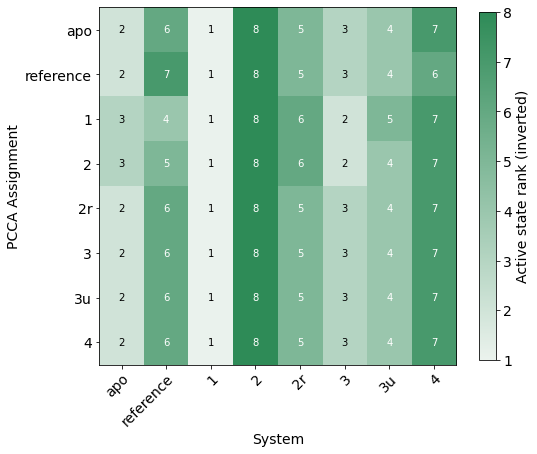

In [38]:
fig, ax = plt.subplots(1, figsize=(8, 8))
im = ax.imshow(pcca_ranked, cmap=sns.light_palette("seagreen", as_cmap=True))

ax.set_ylabel('PCCA Assignment', size=14)
ax.set_xlabel('System', size=14)
ax.set_yticks(np.arange(len(titles)))
ax.set_yticklabels(labels, size=14)
ax.set_xticks(np.arange(len(titles)))
ax.set_xticklabels(labels, size=14)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

cbar = ax.figure.colorbar(im, shrink=0.8)
cbar.set_label('Active state rank (inverted)', size=14)

colors = []
for point in np.hstack(pcca_ranked):
    if point<=3:
        color = 'black'
    else:
        color = 'white'
    colors.append(color)
colors = np.array(colors).reshape(8,8)
for i in range(8):
    for j in range(8):
        ax.text(j, i, round(pcca_ranked[i][j], 2), ha="center", va="center", color=colors[i,j])